<div style="background-color:#f0f8ff; padding:20px; border-radius:8px; border: 1px solid #dcdcdc; max-width: 800px; margin: auto; text-align: center;">
    <h2 style="font-family: Arial, sans-serif; color: #2c3e50; font-size: 28px; margin-bottom: 10px;">
        Cardio Health Risk Assessment 
    </h2>
</div>>


<div style="text-align: center;">
    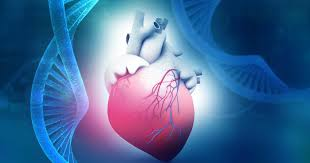
</div>

In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### 1. Loading The Dataset

In [8]:
df = pd.read_csv('../Data/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### 2. Understanding Dataset Structure

In [9]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (270, 14)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Summary Statistics

In [11]:
summary_stats = df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.077778,9.201052,29.0,47.0,54.0,60.75,80.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.00,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.60,6.2


In [12]:
#Checking for duplicated records.
df.duplicated().sum()

0

In [13]:
#Inspecting columns
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [14]:
#Creating a copy of original dataframe
df_copy = df.copy()

### 3. Exploratory Data Analysis (EDA)

### Distribution of Features

In [15]:
#Encoding Target Variable..
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence':0})

In [16]:
df.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,1


In [17]:
heart_disease_count = df['Heart Disease'].value_counts()[1]
disease_free_count = df['Heart Disease'].value_counts()[0]
total_count = df.shape[0]

summary_table = pd.DataFrame({
    'Total Patients': [total_count],
    'Heart Disease Patients': [heart_disease_count],
    'Disease-Free Patients': [disease_free_count]
})
summary_table

,Total Patients,Heart Disease Patients,Disease-Free Patients
0,270,120,150


### 3.1 Count of Individuals with and without Heart Disease by Gender

In [18]:
df_copy['Sex'] = df_copy['Sex'].replace({0: 'Female', 1: 'Male'})

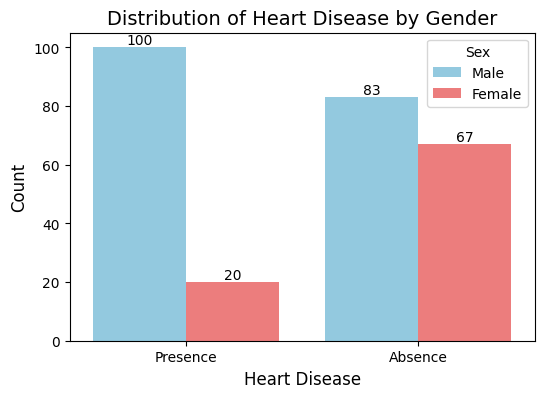

In [19]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_copy, x= 'Heart Disease', hue= 'Sex', palette = ['#87CEEB','#FF6A6A'] ,dodge=True)
plt.title('Distribution of Heart Disease by Gender', fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Heart Disease', fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

* Males have a significantly higher count of Heart Diseases(100) compared to females(20), as shown in the distribution.

### 3.2 Age Distribution Of Patients

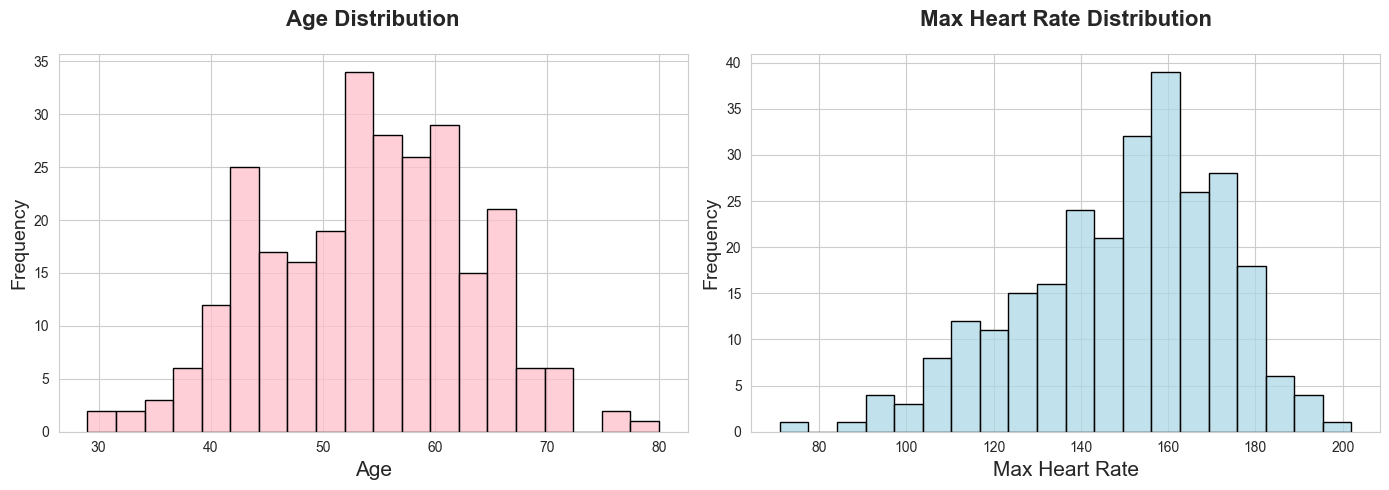

In [47]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age Distribution plot
sns.histplot(df['Age'], color="pink", bins=20, edgecolor='black', ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Age', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=14)

# Max Heart Rate Distribution plot
sns.histplot(df['Max HR'], color="lightblue", bins=20, edgecolor='black', ax=axes[1])
axes[1].set_title('Max Heart Rate Distribution', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Max Heart Rate', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

#### Interpretaions:
1. Age Distribution:
* The age distribution appears to be roughly symmetric and resembles a bell-shaped curve, 
  suggesting a normal distribution.
* Most individuals fall between the ages of 40 and 60, with fewer people under 40 or over 70.

2. Max Heart Rate Distribution:
* The Max HR distribution also resembles a normal distribution but is skewed slightly left, meaning there are fewer people with low max heart rates.
* The majority of max heart rates range between 140 and 170, with a peak around 160, which is expected for middle-aged individuals engaging in physical activity.
* Lower max heart rates are less common, which may correspond to older participants or those with cardiovascular conditions.

### 3.3 Chest Pain Types: 
*  1 = Typical angina (predictive of coronary artery disease)
    + Angina chest pain is typically described as a pressure, tightness, squeezing, or heaviness 
      in the chest.
* 2 = Atypical angina or Atypical chest pain
   + Chest pain that lasts for a few seconds, then quickly subsides. 
* 3 = Non-anginal chest pain(NCCP):
    +  Nonanginal chest pain, which doctors may also call noncardiac chest pain, refers to pain a 
       person without heart disease may feel behind the breast bone. 
* 4 = Asymptomatic chest pain:
    + Chest discomfort or pain that occurs without any noticeable symptoms,  often referred to as 
      "silent heart attack" or "silent myocardial ischemia"

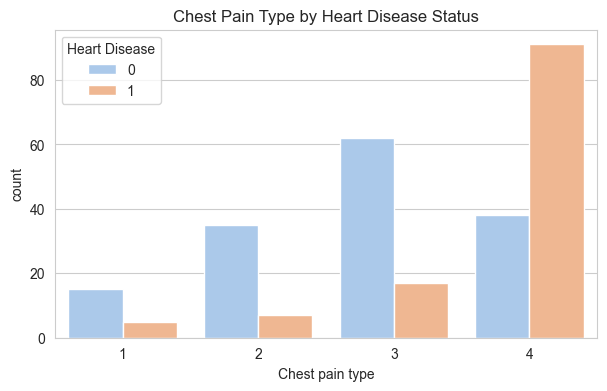

In [48]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Chest pain type', hue='Heart Disease', palette="pastel")
plt.title('Chest Pain Type by Heart Disease Status')
plt.show()

#### Interpretation:
##### 1. Typical Angina (1):
* Few individuals with typical angina have heart disease.
* This may suggest that typical angina (which is often triggered by physical activity and relieved by rest) is less commonly associated with heart disease in this dataset.

##### 2. Atypical Angina (2):
* A higher proportion of individuals with atypical angina do not have heart disease.

##### 3. Non-anginal Chest Pain (3):
* Non-anginal chest pain may be linked with both heart-related and non-heart-related issues, making it a less specific indicator of heart disease.

##### 4. Asymptomatic Chest Pain (4):
* The majority of individuals with asymptomatic chest pain have heart disease.
* Asymptomatic presentation, where there is no chest pain but other signs indicate heart issues, seems to have a strong association with heart disease in this dataset.

<p style="font-family: Arial, sans-serif; color: #289; font-size: 19px; line-height: 1.5;"> 
    The plot suggests that Asymptomatic Chest Pain is the most strongly associated with heart 
    disease, followed by Non-Anginal Chest Pain.
</p>

#### Violin Plot to compare the distribution of chest pain types by heart disease status.

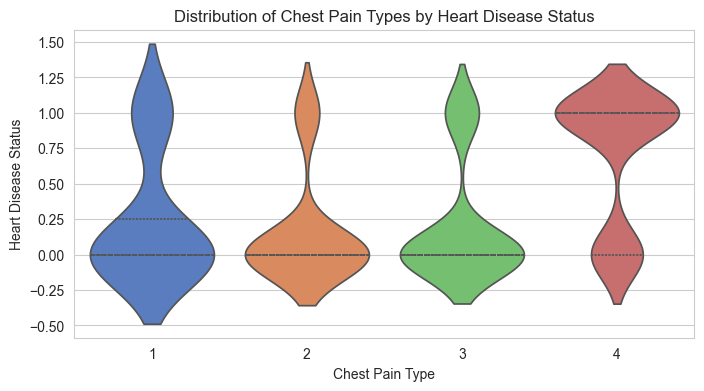

In [50]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Chest pain type', y='Heart Disease', data=df, inner='quartile', palette='muted')

plt.title('Distribution of Chest Pain Types by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease Status')
plt.show()

#### Interpretaion: 
* Individuals with chest pain types 3 and 4 appear to be at a higher risk for heart disease, while those with types 1 and 3 show a lower risk.

### 3.4 Box-Plot Distribution of Max HeartRate for Individuals with and without heart disease

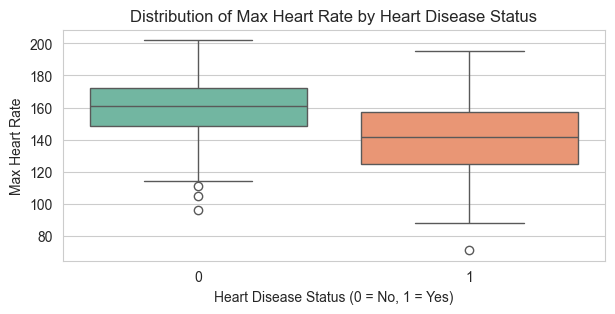

In [51]:
plt.figure(figsize=(7, 3))
sns.boxplot(x='Heart Disease', y='Max HR', data=df, palette='Set2')

plt.title('Distribution of Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

#### Interpretation:
* Individuals without heart disease tend to have a higher max heart rate than those with heart disease. This suggests that a lower max heart rate may be associated with the presence of heart disease.

### 3.5 Blood Pressure (BP) and Cholesterol Analysis:
* BP (Blood Pressure): High blood pressure is a well-known risk factor for heart disease. Chronic hypertension puts extra strain on the heart, leading to conditions like left ventricular hypertrophy and increasing the likelihood of coronary artery disease.
  
* Cholesterol: Elevated cholesterol levels are a strong indicator of heart disease risk. High levels of LDL (low-density lipoprotein) cholesterol can lead to plaque buildup in arteries, reducing blood flow and potentially causing heart attacks.

In [17]:
def plot_bp_and_cholesterol(df):
    plt.figure(figsize=(10, 7))
    
    # 1. Box Plot for Blood Pressure by Heart Disease Status
    plt.subplot(2, 2, 1)
    sns.boxplot(x='Heart Disease', y='BP', data=df, palette='Set2')
    plt.title('Blood Pressure Distribution by Heart Disease Status')
    plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
    plt.ylabel('Blood Pressure')
    
    # 2. KDE Plot for Blood Pressure by Heart Disease Status
    plt.subplot(2, 2, 2)
    sns.kdeplot(data=df[df['Heart Disease'] == 0]['BP'], label='No Heart Disease', fill=True, color='skyblue', alpha=0.5)
    sns.kdeplot(data=df[df['Heart Disease'] == 1]['BP'], label='Heart Disease', fill=True, color='salmon', alpha=0.5)
    plt.title('Blood Pressure Density by Heart Disease Status')
    plt.xlabel('Blood Pressure')
    plt.ylabel('Density')
    plt.legend()

    # 3. Box Plot for Cholesterol by Heart Disease Status
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Heart Disease', y='Cholesterol', data=df, palette='Set3')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
    plt.ylabel('Cholesterol')
    
    # 4. Histogram and KDE Plot for Cholesterol by Heart Disease Status
    plt.subplot(2, 2, 4)
    sns.histplot(df[df['Heart Disease'] == 0]['Cholesterol'], label='No Heart Disease', color='lightblue', kde=True, bins=30, alpha=0.6)
    sns.histplot(df[df['Heart Disease'] == 1]['Cholesterol'], label='Heart Disease', color='lightcoral', kde=True, bins=30, alpha=0.6)
    plt.title('Cholesterol Distribution by Heart Disease Status (Histogram & KDE)')
    plt.xlabel('Cholesterol')
    plt.ylabel('Frequency / Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

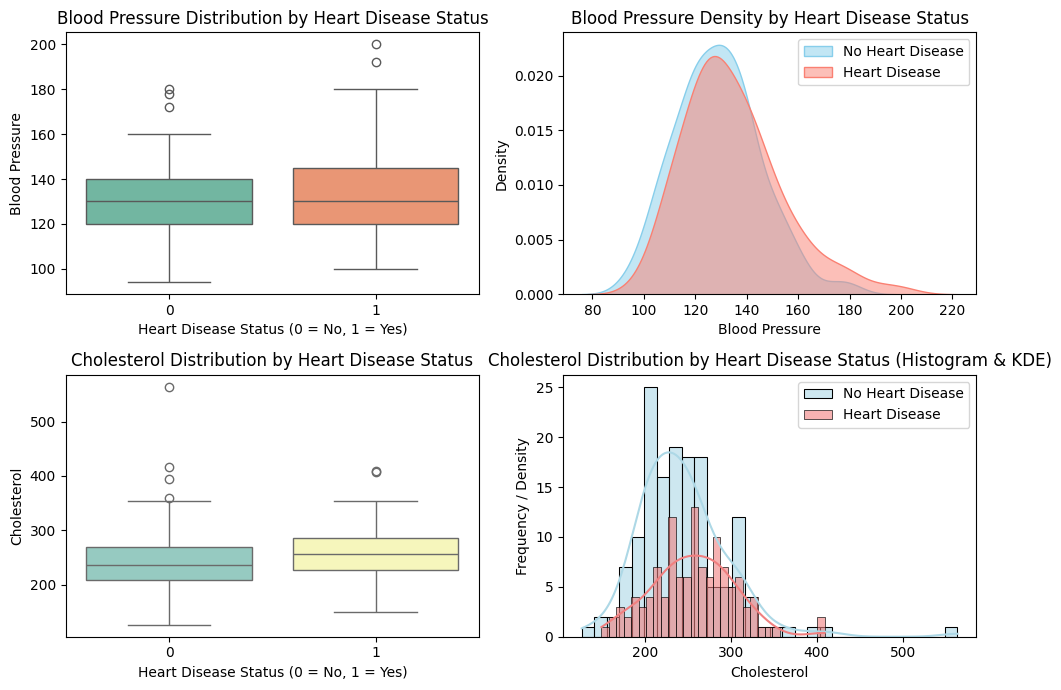

In [18]:
plot_bp_and_cholesterol(df)

#### Interpretation:
1. Box Plot of Blood Pressure by Heart Disease Status:
   * The plot suggests that individuals with heart disease tend to have a slightly higher and more 
     variable range of blood pressure, although there is overlap between the two groups.

2. KDE Plot of Blood Pressure by Heart Disease Status:
   * The blue curve (No Heart Disease) and red curve (Heart Disease) both peak around similar 
     values, suggesting that typical blood pressure levels are close between the two groups.
   * However, the heart disease group has a slightly flatter curve, indicating a more spread-out 
     distribution towards higher blood pressure values.
   * The overlap in the curves shows that while there is a tendency for higher blood pressure 
    among individuals with heart disease, the distributions are not entirely distinct.

3. Box Plot of Cholesterol by Heart Disease Status:
    * The plot suggests that while high cholesterol levels are present in both groups, the 
      distribution patterns are similar, though with fewer extreme outliers in the heart disease 
       group.

4. Histogram with KDE of Cholesterol by Heart Disease Status:
    * The blue bars (No Heart Disease) show a higher density of individuals with cholesterol 
      levels around 200, which declines as cholesterol levels increase.
    * The red bars (Heart Disease) also show a peak around 200 but appear slightly more 
      distributed across higher cholesterol levels.
    * The KDE lines (smooth curves) indicate the general trend of cholesterol distribution, 
      showing that the heart disease group has a wider spread towards higher cholesterol values 
      compared to the no heart disease group.

### 3.6 Fasting Blood Sugar (FBS over 120)
* Fasting blood sugar over 120 mg/dl indicates hyperglycemia and is associated with diabetes, a risk factor for heart disease. Diabetes often coincides with other risk factors like hypertension and high cholesterol.

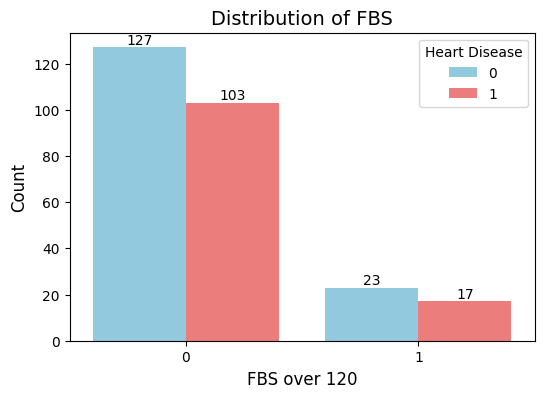

In [19]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x= 'FBS over 120', hue= 'Heart Disease', palette = ['#87CEEB','#FF6A6A'] ,dodge=True)
plt.title('Distribution of FBS', fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('FBS over 120', fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Interpretation:
* The above plot shows that there are less heart patients with FBS over 120.

### 3.7 ST Depression and Slope of ST
* The slope of ST depression on an electrocardiogram (ECG) can indicate the likelihood of coronary artery disease (CAD) and the severity of ischemic ST depression.
1. Upsloping:
   * The ST segment slopes upwards.
   * This can sometimes be seen in normal, healthy individuals but is less common in those with heart disease.
   * It may be less suggestive of ischemia (reduced blood flow to the heart) compared to other slopes but can still appear in certain cases of coronary artery disease.
  
2. Flat (Horizontal):
   * A flat ST segment is often associated with myocardial ischemia, meaning there may be a reduced blood supply to the heart muscle.
   * It is considered more significant for diagnosing heart disease compared to an upsloping ST segment.

3. Downsloping:
   * This pattern is typically more concerning and is often associated with ischemic heart disease.
   * It can indicate significant myocardial ischemia and is considered a strong indicator of potential heart problems.
  
   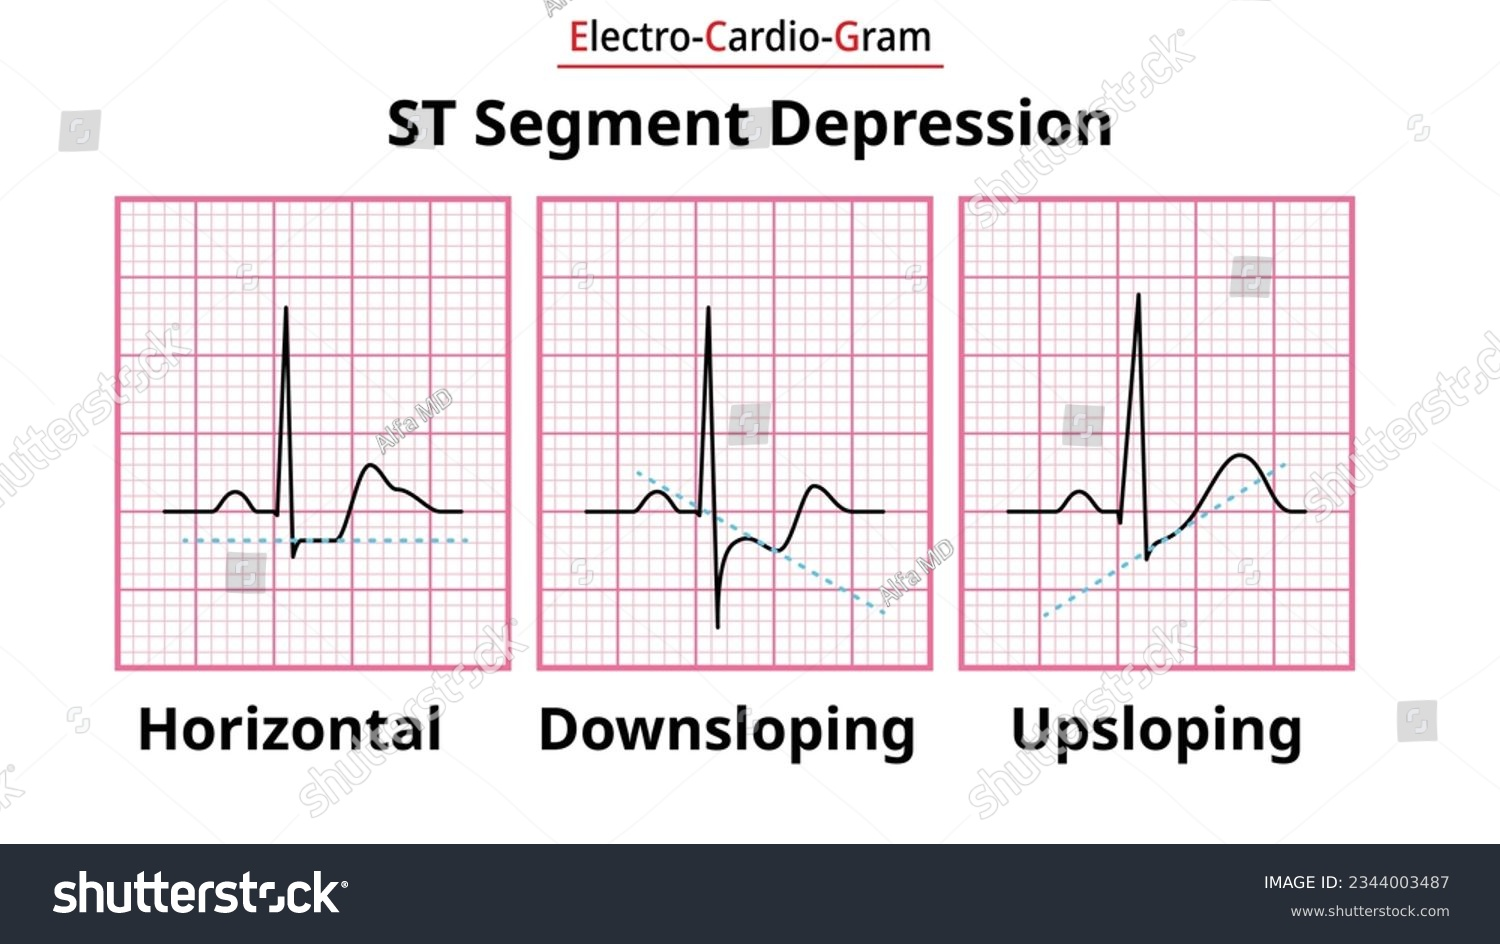

##### ST Depression:
- ST depression refers to a finding on an electrocardiogram (ECG) where the ST segment is lower than the baseline level. It can indicate underlying heart conditions, especially in the context of coronary artery disease.

In [62]:
df['Slope of ST'].value_counts()

Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

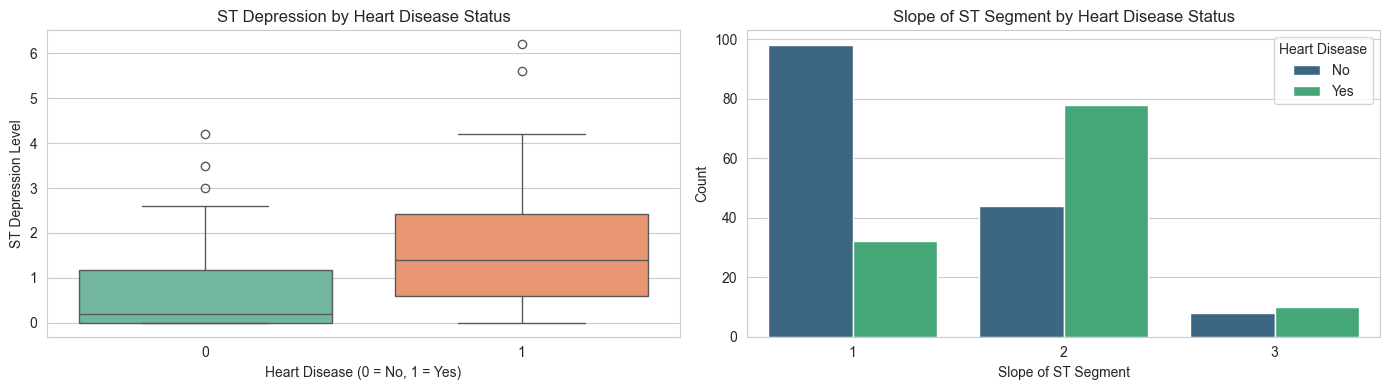

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Box Plot for ST Depression by Heart Disease Status
sns.boxplot(data=df, x='Heart Disease', y='ST depression', palette='Set2', ax=axes[0])
axes[0].set_title('ST Depression by Heart Disease Status')
axes[0].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[0].set_ylabel('ST Depression Level')

# Count Plot for Slope of ST Segment by Heart Disease Status
sns.countplot(data=df, x='Slope of ST', hue='Heart Disease', palette='viridis', ax=axes[1])
axes[1].set_title('Slope of ST Segment by Heart Disease Status')
axes[1].set_xlabel('Slope of ST Segment')
axes[1].set_ylabel('Count')
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### 3.8 Number of Vessels and Thallium Test
1. Number of Vessels Fluro: This refers to the number of major blood vessels (0-3) observed during a fluoroscopy scan that show significant narrowing due to blockages or abnormalities.
   * Fluoroscopy is a type of X-ray imaging, often enhanced with contrast dye, that visualizes 
     blood flow through the coronary arteries.
   * The higher the count of affected vessels, the greater the likelihood of heart disease, as it 
    indicates more widespread arterial blockages. This feature often ranges from 0 (no significant 
     blockages) to 3 or more, where higher values correlate with an increased heart disease risk.


2. Thallium Test: This is a type of nuclear stress test, also called myocardial perfusion imaging, 
   used to assess blood flow to the heart muscle. During this test, a small amount of radioactive 
   material (Thallium) is injected into the bloodstream while the patient is at rest or during 
   exercise.
   * Imaging captures areas with limited blood flow, helping to detect ischemia or scarring from 
     prior heart attacks. Thallium test results typically range in discrete values that indicate 
     the severity of perfusion defects.
   * Higher scores or certain categories can signal a greater likelihood of ischemia, linking 
     directly to potential heart disease.

In [74]:
print(df['Number of vessels fluro'].value_counts())
print(df['Thallium'].value_counts())

Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64
Thallium
3    152
7    104
6     14
Name: count, dtype: int64


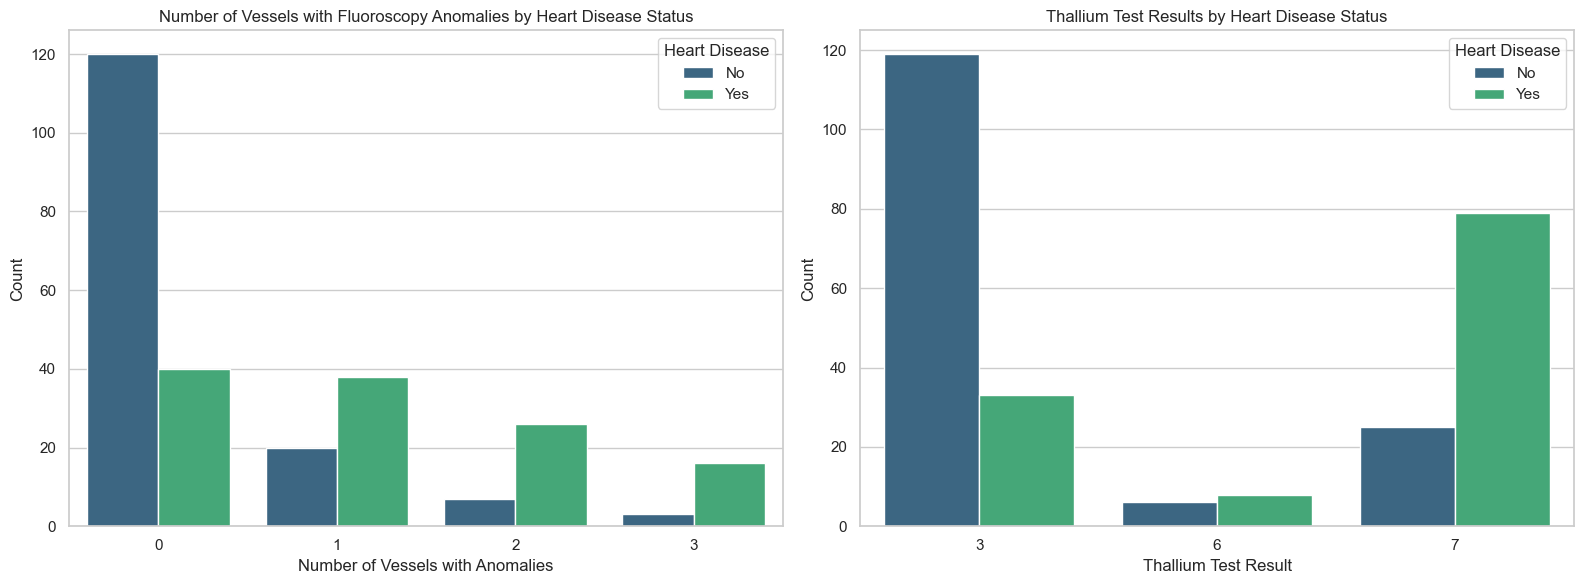

In [64]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of Vessels Fluro by Heart Disease Status
sns.countplot(data=df, x='Number of vessels fluro', hue='Heart Disease', palette='viridis', ax=axes[0])
axes[0].set_title('Number of Vessels with Fluoroscopy Anomalies by Heart Disease Status')
axes[0].set_xlabel('Number of Vessels with Anomalies')
axes[0].set_ylabel('Count')
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])

# Plot 2: Thallium Test Results by Heart Disease Status
sns.countplot(data=df, x='Thallium', hue='Heart Disease', palette='viridis', ax=axes[1])
axes[1].set_title('Thallium Test Results by Heart Disease Status')
axes[1].set_xlabel('Thallium Test Result')
axes[1].set_ylabel('Count')
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

#### Interpretation:
* Thallium Score 3: A score of 3 is much more common in individuals without heart disease, suggesting that this score may indicate either normal or less severe perfusion defects. The high count in the no-heart-disease group implies that this score is less likely to correlate with heart disease.
  
* Thallium Score 7:  The majority of individuals with a Thallium score of 7 have heart disease, as shown by the count of 79. This score could indicate moderate to severe perfusion issues, which are more commonly associated with heart disease.
  
* Thallium Score 6: A Thallium score of 6 is relatively rare across both groups, but it’s slightly more frequent in the heart disease group. The low counts suggest that this score might represent specific cases with unique conditions or severe anomalies, though the small difference between groups limits the clarity of its predictive value.

### 3.8 Correlation Matrix

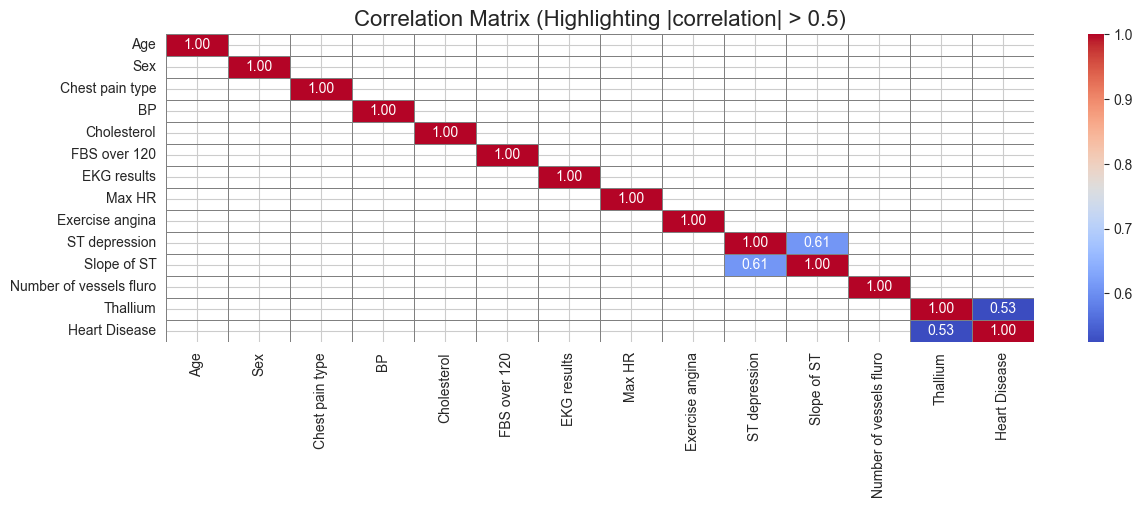

In [52]:
correlation_matrix = df.corr()

# Mask correlations with absolute values less than or equal to 0.50
mask = np.abs(correlation_matrix) <= 0.50
filtered_correlation = correlation_matrix.copy()
filtered_correlation[mask] = 0

plt.figure(figsize=(14, 4))
sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, 
            mask=mask, linewidths=0.5, linecolor='grey')
plt.title("Correlation Matrix (Highlighting |correlation| > 0.5)", fontsize=16)
plt.show()

* Correlation results show some moderate relationships between specific features:
1. ST Depression and Slope of ST: A correlation of 0.61 indicates a moderate positive relationship, suggesting that as ST depression increases, the slope of ST also tends to increase. This could imply a linked physiological response or a similar underlying factor affecting both.
   
2. Heart Disease and Thallium: A correlation of 0.53 indicates a moderate association, suggesting that changes in Thallium levels may be somewhat related to the presence of heart disease.
   + Thallium tests are often used in stress testing to assess blood flow to the heart, so this correlation aligns with the medical relevance of Thallium in heart disease diagnostics. 

### 3.9 Scatter Plots 

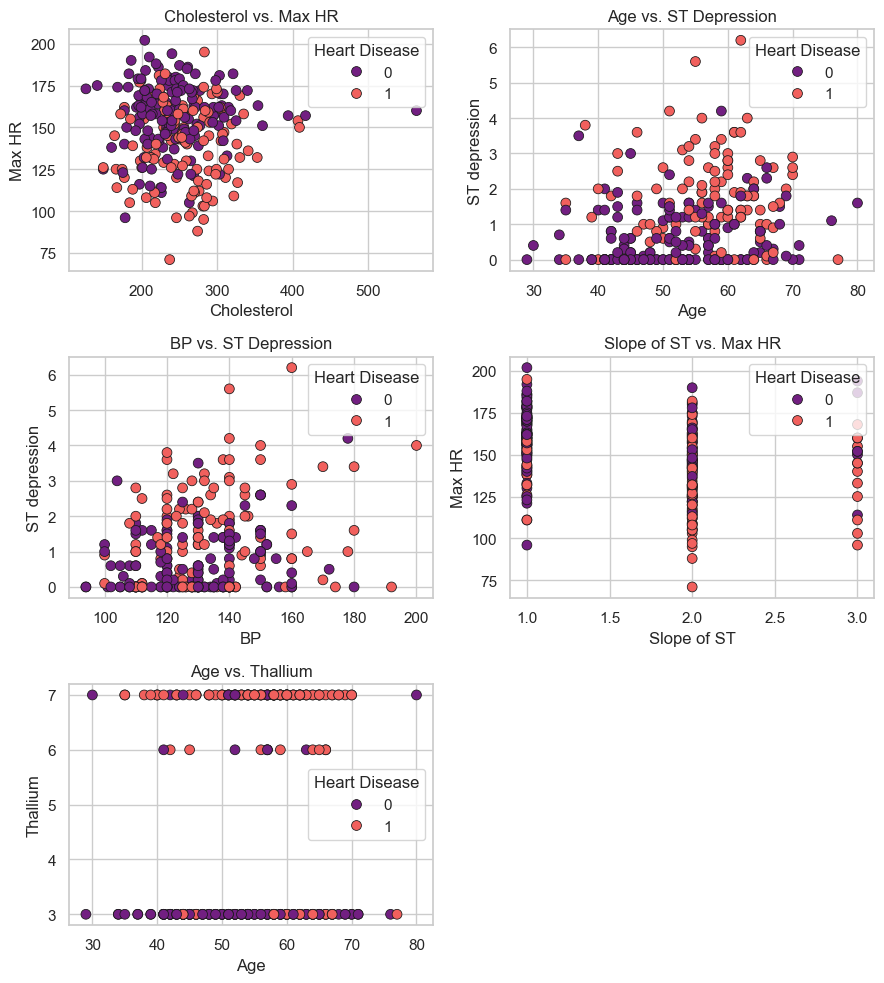

In [72]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(9, 10))

sns.scatterplot(data=df, x='Cholesterol', y='Max HR', hue='Heart Disease', 
                palette='magma', ax=axes[0, 0], s=50, edgecolor='k')
axes[0, 0].set_title('Cholesterol vs. Max HR')

sns.scatterplot(data=df, x='Age', y='ST depression', hue='Heart Disease', 
                palette='magma', ax=axes[0, 1], s=50, edgecolor='k')
axes[0, 1].set_title('Age vs. ST Depression')

sns.scatterplot(data=df, x='BP', y='ST depression', hue='Heart Disease', 
                palette='magma', ax=axes[1, 0], s=50, edgecolor='k')
axes[1, 0].set_title('BP vs. ST Depression')

sns.scatterplot(data=df, x='Slope of ST', y='Max HR', hue='Heart Disease', 
                palette='magma', ax=axes[1, 1], s=50, edgecolor='k')
axes[1, 1].set_title('Slope of ST vs. Max HR')

sns.scatterplot(data=df, x='Age', y='Thallium', hue='Heart Disease', 
                palette='magma', ax=axes[2, 0], s=50, edgecolor='k')
axes[2, 0].set_title('Age vs. Thallium')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

#### Interpretation:
1. Cholesterol vs. Max HR (first plot, leftmost):
+ Although there is some overlap, people with heart disease (orange points) appear to cluster at lower maximum heart rates (below 150). Higher cholesterol levels seem to have less direct association, as individuals with and without heart disease are spread out across the range.

2. Age vs. ST Depression (second plot, second in the first row):
+ Heart disease cases (orange points) generally display higher values of ST depression compared to non-heart disease cases.
+ This plot suggests that higher ST depression levels may be more common among older individuals and those with heart disease.

3. BP vs. ST Depression (third plot, first in the second row):
+ heart disease cases tend to have higher ST depression levels.
+ Blood pressure (BP) does not show a clear pattern with heart disease, as both heart disease and non-heart disease cases span across different BP values.

4. Slope of ST vs. Max HR (fourth plot, rightmost in the second row):
+ The slope of the ST segment appears to cluster around specific values (1, 2, and 3). Individuals with heart disease are more frequent at lower values of the slope (1), while those without heart disease are more frequent at higher slopes.
+ Lower slopes of the ST segment could be associated with heart disease, especially when paired with lower maximum heart rates.

5. Age vs. Thallium (fifth plot, leftmost in the third row):
+ Thallium levels appear to have discrete values, with heart disease cases concentrated at certain levels.
+ A higher Thallium value (e.g., 7.0) may indicate a higher likelihood of heart disease.

#### Overall Insights:
#### Higher ST depression, lower maximum heart rates, and lower slopes of the ST segment seem to correlate with heart disease.
#### Cholesterol, blood pressure, and age alone are less clearly associated with heart disease, but ST depression and certain Thallium levels may serve as important indicators.